## User overview and engagement analysis

In [1]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
import sys
current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)
print(parent_dir)

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# Insert the path to the Scripts directory
sys.path.insert(0, os.path.join(parent_dir, 'scripts'))

print(sys.path)

d:\10Academy-KAIM\week 2\KAIM-Week-2\notebooks
d:\10Academy-KAIM\week 2\KAIM-Week-2
['d:\\10Academy-KAIM\\week 2\\KAIM-Week-2\\scripts', 'd:\\10Academy-KAIM\\week 2\\KAIM-Week-2', 'd:\\10Academy-KAIM\\week 2\\KAIM-Week-2\\notebooks', 'C:\\Program Files\\Python311\\python311.zip', 'C:\\Program Files\\Python311\\DLLs', 'C:\\Program Files\\Python311\\Lib', 'C:\\Program Files\\Python311', 'd:\\10Academy-KAIM\\week 2\\KAIM-Week-2\\.venv', '', 'd:\\10Academy-KAIM\\week 2\\KAIM-Week-2\\.venv\\Lib\\site-packages', 'd:\\10Academy-KAIM\\week 2\\KAIM-Week-2\\.venv\\Lib\\site-packages\\win32', 'd:\\10Academy-KAIM\\week 2\\KAIM-Week-2\\.venv\\Lib\\site-packages\\win32\\lib', 'd:\\10Academy-KAIM\\week 2\\KAIM-Week-2\\.venv\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\kulhab\\AppData\\Roaming\\Python\\Python311\\site-packages', 'C:\\Program Files\\Python311\\Lib\\site-packages']


In [ ]:
from scripts.user_overview_and_engagement_analysis import read_data, user_aggregated_data

: 

In [ ]:
# import the csv file
data = read_data('../data/Week2_challenge_data_source(CSV).csv')

: 

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

: 

In [4]:
#print unique bearer id and the frequency they appear
data['Bearer Id'].unique()

array([1.31e+19, 1.30e+19, 7.28e+18, 7.35e+18, 1.27e+19, 6.92e+18,
            nan, 1.32e+19, 7.42e+18, 7.57e+18])

In [5]:
# number of unique Handset Manufacturer
data['Handset Manufacturer'].nunique()

170

In [6]:
#print unique handsets and the frequency they appear
data['Handset Manufacturer'].value_counts()

Handset Manufacturer
Apple                               59565
Samsung                             40839
Huawei                              34423
undefined                            8987
Sony Mobile Communications Ab         980
                                    ...  
Pt. Arga Mas Lestari                    1
Doke Communication (Hk) Limited         1
Vastking Technology (Hk) Limited        1
Mobiwire Sas                            1
Shenzhen Gaoxinqi                       1
Name: count, Length: 170, dtype: int64

Text(0, 0.5, 'Frequency')

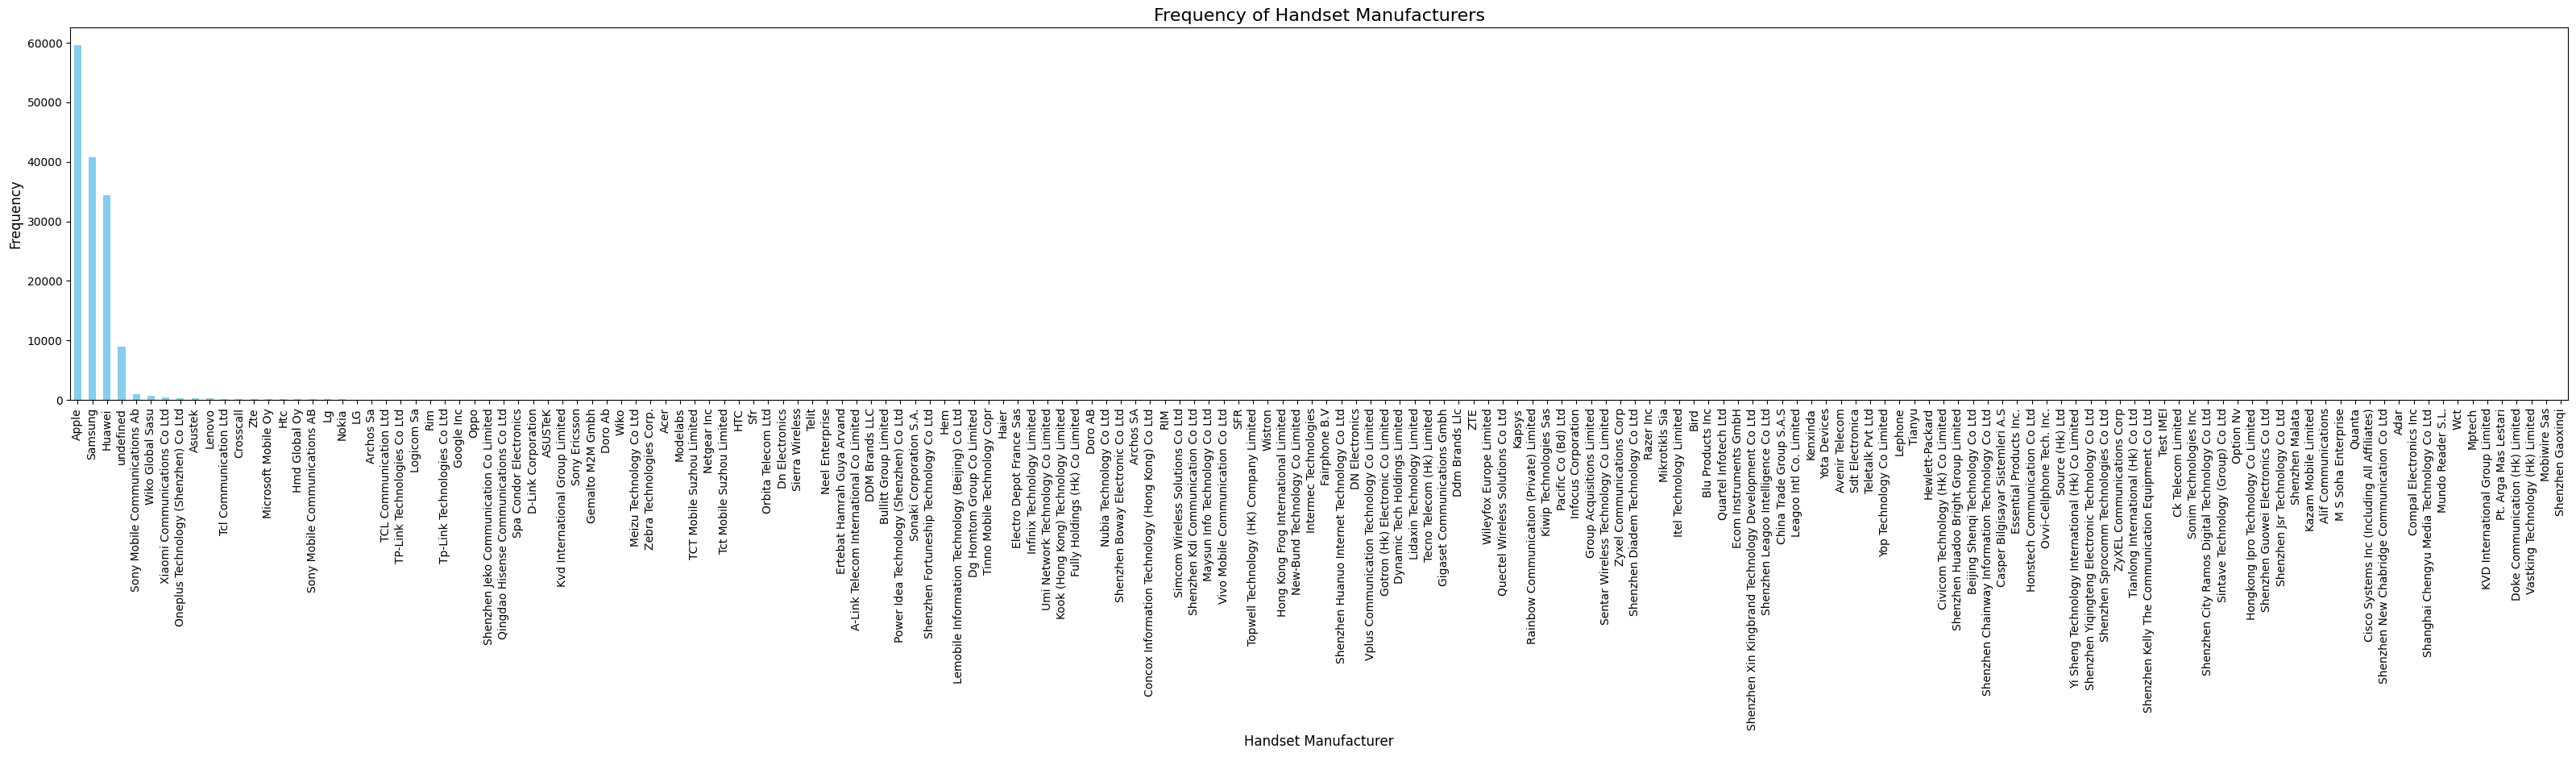

In [7]:
# Count the occurrences of each unique handset manufacturer
import matplotlib.pyplot as plt
manufacturer_counts = data['Handset Manufacturer'].value_counts()

# Plot the data
plt.figure(figsize=(40,6))
manufacturer_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Frequency of Handset Manufacturers', fontsize=16)
plt.xlabel('Handset Manufacturer', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

Text(0, 0.5, 'Frequency')

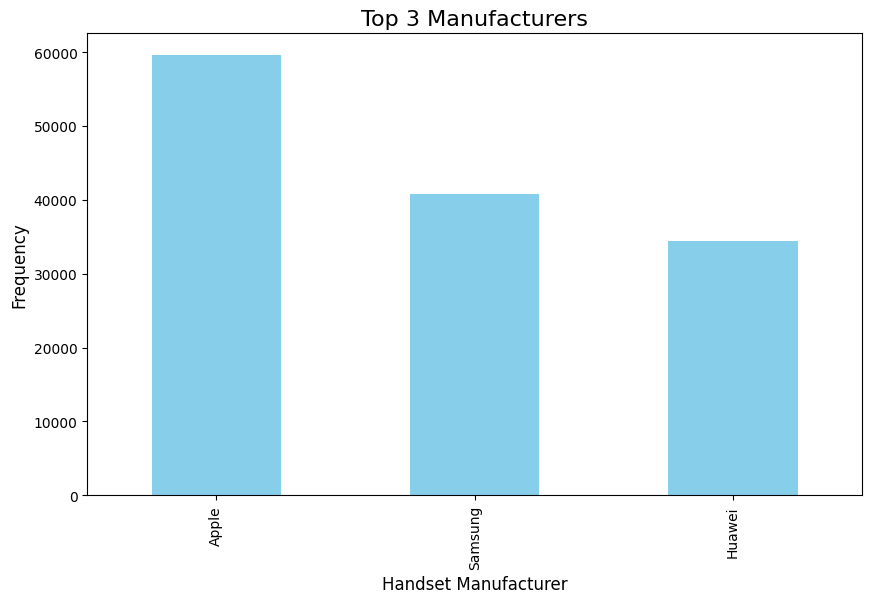

In [8]:
# top 3 handset manufacturers
import matplotlib.pyplot as plt
manufacturer_counts = data['Handset Manufacturer'].value_counts().nlargest(3)

# Plot the data
plt.figure(figsize=(10,6))
manufacturer_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Top 3 Manufacturers', fontsize=16)
plt.xlabel('Handset Manufacturer', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

Text(0, 0.5, 'Frequency')

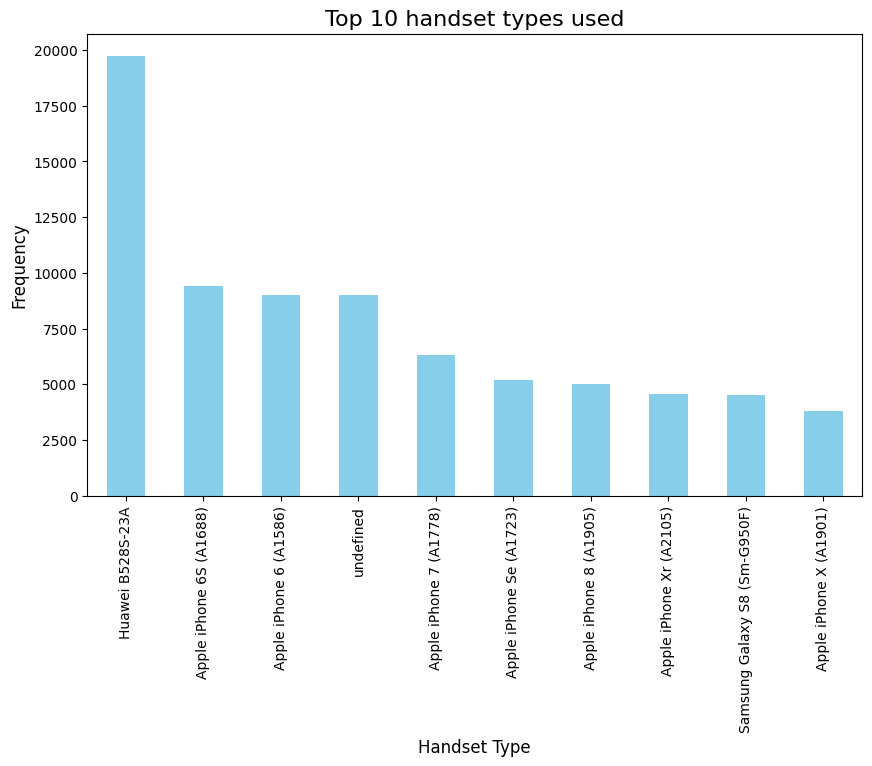

In [9]:
# top 10 handset manufacturers
import matplotlib.pyplot as plt
manufacturer_counts = data['Handset Type'].value_counts().nlargest(10)

# Plot the data
plt.figure(figsize=(10,6))
manufacturer_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Top 10 handset types used', fontsize=16)
plt.xlabel('Handset Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

In [10]:
# Count frequency of each handset per manufacturer
handset_freq = data.groupby(['Handset Manufacturer', 'Handset Type']).size().reset_index(name='Frequency')

# Get the top 3 manufacturers
top_3_manufacturers = data['Handset Manufacturer'].value_counts().index[:3]

# Filter to include only top 3 manufacturers
top_3_df = handset_freq[handset_freq['Handset Manufacturer'].isin(top_3_manufacturers)]


In [11]:
# Get the top 5 handsets for each manufacturer
top_5_per_manufacturer = top_3_df.groupby('Handset Manufacturer').apply(lambda x: x.nlargest(5, 'Frequency')).reset_index(drop=True)

print(top_5_per_manufacturer)


   Handset Manufacturer                    Handset Type  Frequency
0                 Apple         Apple iPhone 6S (A1688)       9419
1                 Apple          Apple iPhone 6 (A1586)       9023
2                 Apple          Apple iPhone 7 (A1778)       6326
3                 Apple         Apple iPhone Se (A1723)       5187
4                 Apple          Apple iPhone 8 (A1905)       4993
5                Huawei                Huawei B528S-23A      19752
6                Huawei                    Huawei E5180       2079
7                Huawei  Huawei P20 Lite Huawei Nova 3E       2021
8                Huawei                      Huawei P20       1480
9                Huawei                  Huawei Y6 2018        997
10              Samsung    Samsung Galaxy S8 (Sm-G950F)       4520
11              Samsung      Samsung Galaxy A5 Sm-A520F       3724
12              Samsung     Samsung Galaxy J5 (Sm-J530)       3696
13              Samsung     Samsung Galaxy J3 (Sm-J330)       

C:\Users\kulhab\AppData\Local\Temp\ipykernel_9100\392351882.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_per_manufacturer = top_3_df.groupby('Handset Manufacturer').apply(lambda x: x.nlargest(5, 'Frequency')).reset_index(drop=True)


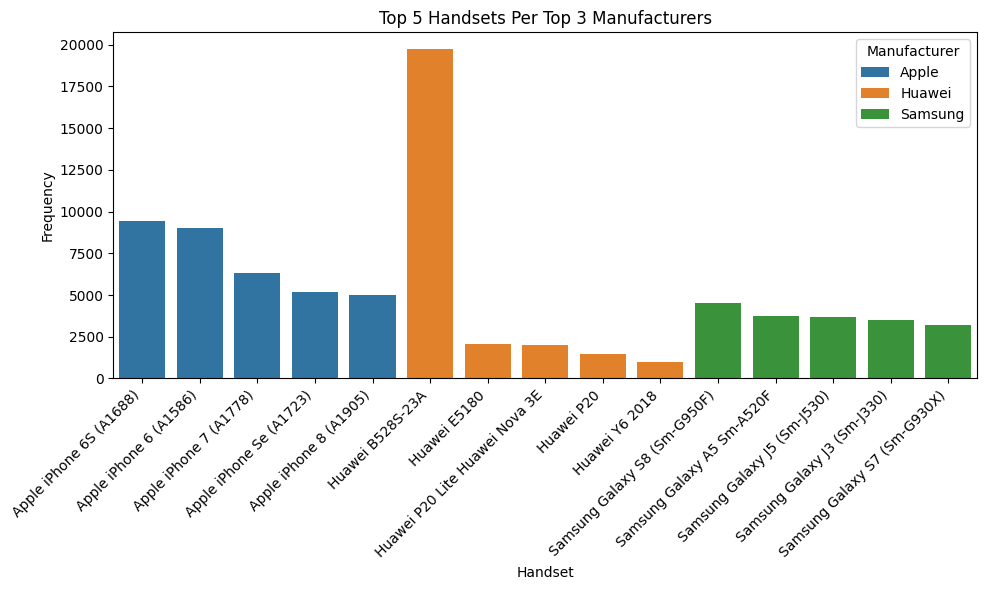

In [12]:
import seaborn as sns
# Plotting
plt.figure(figsize=(10, 6))

# Use seaborn for a cleaner plot
sns.barplot(data=top_5_per_manufacturer, x='Handset Type', y='Frequency', hue='Handset Manufacturer')

# Customize the plot
plt.title('Top 5 Handsets Per Top 3 Manufacturers')
plt.xlabel('Handset')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.legend(title='Manufacturer')
plt.tight_layout()

# Show the plot
plt.show()

### Task 1.1 - Aggregating information per user

In [14]:
# Step 1: Group the data by user ('MSISDN/Number')
aggregated_data = data.groupby('MSISDN/Number').agg(
    # Step 2: Count the number of xDR sessions per user
    Number_of_xDR_Sessions=('Bearer Id', 'count'),
    
    # Step 3: Calculate the total session duration per user
    Total_Session_Duration=('Dur. (ms)', 'sum'),
    
    # Step 4: Sum the total downloaded data per user
    Total_DL_Data=('Total DL (Bytes)', 'sum'),
    
    # Step 5: Sum the total uploaded data per user
    Total_UL_Data=('Total UL (Bytes)', 'sum')
)

# Step 6: Add a new column for total data volume (DL + UL)
aggregated_data['Total_Data_Volume'] = aggregated_data['Total_DL_Data'] + aggregated_data['Total_UL_Data']

# Step 7: Reset the index to turn the grouped data back into a DataFrame
aggregated_data = aggregated_data.reset_index()

In [16]:
aggregated_data.head()

,MSISDN/Number,Number_of_xDR_Sessions,Total_Session_Duration,Total_DL_Data,Total_UL_Data,Total_Data_Volume
0,3.360100e+10,1,116720.0,8.426375e+08,36053108.0,8.786906e+08
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,1.568596e+08
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,5.959665e+08
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,4.223207e+08
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,1.457411e+09


In [15]:
# Save DataFrame to CSV
aggregated_data.to_csv('../aggregated_per_user_data.csv', index=False)

In [16]:
aggregated_data.isnull().sum()

MSISDN/Number             0
Number_of_xDR_Sessions    0
Total_Session_Duration    0
Total_DL_Data             0
Total_UL_Data             0
Total_Data_Volume         0
dtype: int64

### Task 1.2

In [5]:
# Disable scientific notation in pandas
pd.set_option('display.float_format', '{:.2f}'.format)

In [6]:
# import the aggregated_per_user data
per_user = pd.read_csv('../aggregated_per_user_data.csv')
per_user.head()

,MSISDN/Number,Number_of_xDR_Sessions,Total_Session_Duration,Total_DL_Data,Total_UL_Data,Total_Data_Volume
0,33601001722.00,1,116720.00,842637466.00,36053108.00,878690574.00
1,33601001754.00,1,181230.00,120755184.00,36104459.00,156859643.00
2,33601002511.00,1,134969.00,556659663.00,39306820.00,595966483.00
3,33601007832.00,1,49878.00,401993172.00,20327526.00,422320698.00
4,33601008617.00,2,37104.00,1363130417.00,94280527.00,1457410944.00


In [8]:
# checking for missing values
per_user.isnull().sum()

MSISDN/Number             0
Number_of_xDR_Sessions    0
Total_Session_Duration    0
Total_DL_Data             0
Total_UL_Data             0
Total_Data_Volume         0
dtype: int64

In [7]:
# segment users into top five decile classes based 

# Step 1: Calculate decile ranks based on Total_Session_Duration
per_user['Decile_Class'] = pd.qcut(per_user['Total_Session_Duration'], q=10, labels=False, duplicates='drop') + 1

# Step 2: Filter the top five deciles (6, 7, 8, 9, 10)
top_five_deciles = per_user[per_user['Decile_Class'] >= 6]

# Step 3: Group by decile class and compute the total data (DL + UL) for each decile
decile_summary = top_five_deciles.groupby('Decile_Class').agg(
    Total_Data_Volume_Per_Decile=('Total_Data_Volume', 'sum')
).reset_index()

# Display the decile summary
print(decile_summary)

   Decile_Class  Total_Data_Volume_Per_Decile
0             6              6426251197532.00
1             7              6152477842172.00
2             8              7822234212575.00
3             9              9305494858252.00
4            10             14863927074822.00


In [8]:
decile_summary.head()

,Decile_Class,Total_Data_Volume_Per_Decile
0,6,6426251197532.00
1,7,6152477842172.00
2,8,7822234212575.00
3,9,9305494858252.00
4,10,14863927074822.00


In [9]:
# Compute basic descriptive statistics for the dataset
basic_metrics = per_user.describe()

# Display the metrics
print(basic_metrics)

           MSISDN/Number  Number_of_xDR_Sessions  Total_Session_Duration  \
count          106856.00               106856.00               106856.00   
mean      45111049288.37                    1.39               146167.16   
std     2888288588873.96                    0.81               186358.67   
min       33601001722.00                    0.00                 7142.00   
25%       33650876081.25                    1.00                71308.00   
50%       33663649735.00                    1.00               102740.00   
75%       33683436741.75                    2.00               172799.00   
max   882000000000000.00                   18.00             18553754.00   

       Total_DL_Data  Total_UL_Data  Total_Data_Volume  Decile_Class  
count      106856.00      106856.00          106856.00     106856.00  
mean    633652680.89    57309422.41       690962103.31          5.49  
std     464555056.46    35657649.75       491055891.07          2.88  
min       8827082.00     286689

In [10]:
# Compute descriptive statistics
desc_stats = per_user.describe()
# Compute additional dispersion parameters
range_values = per_user.max() - per_user.min()
variance_values = per_user.var()
std_dev_values = per_user.std()
iqr_values = per_user.quantile(0.75) - per_user.quantile(0.25)

# Combine all metrics into a single DataFrame for easier viewing
dispersion_metrics = pd.DataFrame({
    'Mean': desc_stats.loc['mean'],
    'Median': desc_stats.loc['50%'],
    'Standard Deviation': std_dev_values,
    'Variance': variance_values,
    'Range': range_values,
    'IQR': iqr_values
})

# Display the dispersion metrics
print(dispersion_metrics)

                                 Mean         Median  Standard Deviation  \
MSISDN/Number          45111049288.37 33663649735.00    2888288588873.96   
Number_of_xDR_Sessions           1.39           1.00                0.81   
Total_Session_Duration      146167.16      102740.00           186358.67   
Total_DL_Data            633652680.89   570367723.00        464555056.46   
Total_UL_Data             57309422.41    46793865.50         35657649.75   
Total_Data_Volume        690962103.31   617923138.00        491055891.07   
Decile_Class                     5.49           5.50                2.88   

                                           Variance              Range  \
MSISDN/Number          8342210972619502266613760.00 881966398998278.00   
Number_of_xDR_Sessions                         0.66              18.00   
Total_Session_Duration               34729553763.15        18546612.00   
Total_DL_Data                 215811400483495456.00      8147916411.00   
Total_UL_Data        

In [11]:
dispersion_metrics.head()

,Mean,Median,Standard Deviation,Variance,Range,IQR
MSISDN/Number,45111049288.37,33663649735.00,2888288588873.96,8342210972619502266613760.00,881966398998278.00,32560660.50
Number_of_xDR_Sessions,1.39,1.00,0.81,0.66,18.00,1.00
Total_Session_Duration,146167.16,102740.00,186358.67,34729553763.15,18546612.00,101491.00
Total_DL_Data,633652680.89,570367723.00,464555056.46,215811400483495456.00,8147916411.00,492537426.50
Total_UL_Data,57309422.41,46793865.50,35657649.75,1271467985560664.00,726710488.00,29336518.25


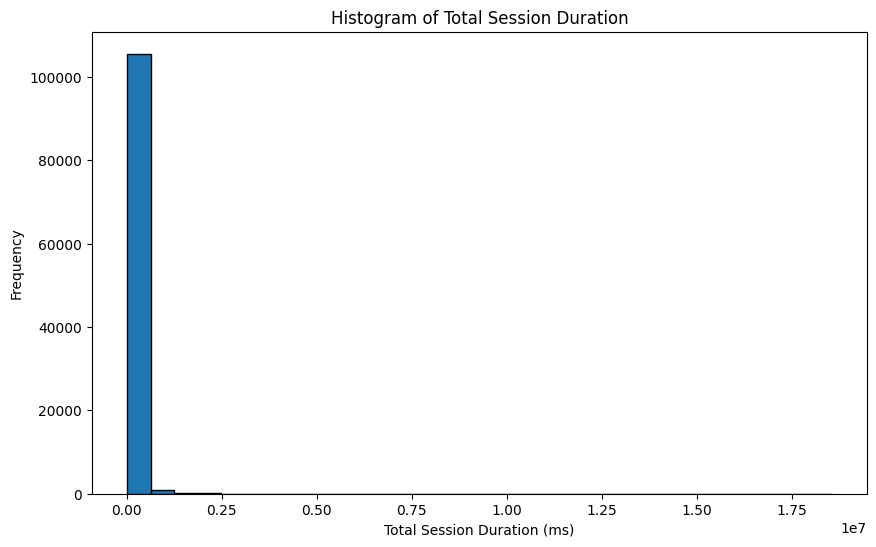

In [12]:
# graphical univariate analysis
# Histogram for Total_Session_Duration
plt.figure(figsize=(10, 6))
plt.hist(per_user['Total_Session_Duration'], bins=30, edgecolor='black')
plt.title('Histogram of Total Session Duration')
plt.xlabel('Total Session Duration (ms)')
plt.ylabel('Frequency')
plt.show()

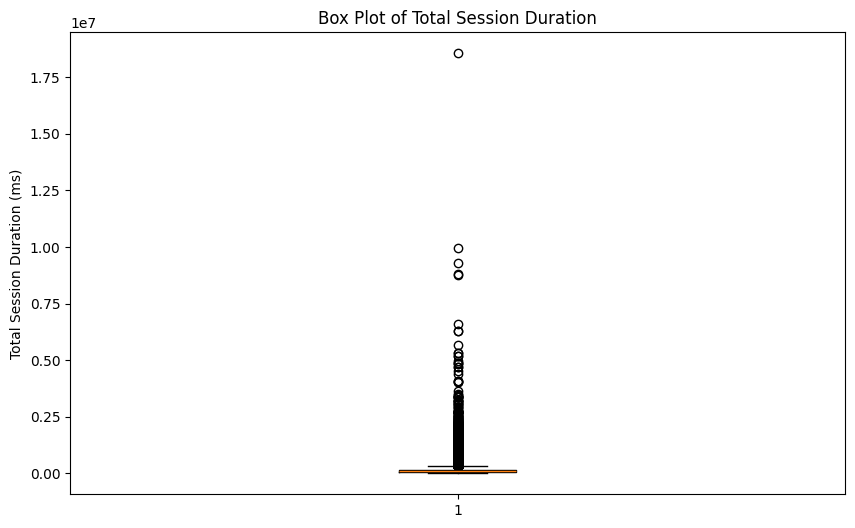

In [13]:
plt.figure(figsize=(10, 6))
plt.boxplot(per_user['Total_Session_Duration'])
plt.title('Box Plot of Total Session Duration')
plt.ylabel('Total Session Duration (ms)')
plt.show()

In [15]:
pd.set_option('display.max_columns', None)
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13100000000000000000.00,4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,1823652.00,208000000000000.00,33664962239.00,35500000000000.00,9.16E+15,42.00,5.00,23.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,37624.00,38787.00,1823652892.00,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.00,214.00,1545765.00,24420.00,1634479.00,1271433.00,3563542.00,137762.00,15854611.00,2501332.00,8198936.00,9656251.00,278082303.00,14344150.00,171744450.00,8814393.00,36749741.00,308879636.00
1,13100000000000000000.00,4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,1365104.00,208000000000000.00,33681854413.00,35800000000000.00,L77566A,65.00,5.00,16.00,26.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,168.00,3560.00,1365104371.00,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.00,1022.00,1926113.00,7165.00,3493924.00,920172.00,629046.00,308339.00,20247395.00,19111729.00,18338413.00,17227132.00,608750074.00,1170709.00,526904238.00,15055145.00,53800391.00,653384965.00
2,13100000000000000000.00,4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,1361762.00,208000000000000.00,33760627129.00,35300000000000.00,D42335A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,1361762651.00,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.00,695.00,1684053.00,42224.00,8535055.00,1694064.00,2690151.00,672973.00,19725661.00,14699576.00,17587794.00,6163408.00,229584621.00,395630.00,410692588.00,4215763.00,27883638.00,279807335.00
3,13100000000000000000.00,4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,1321509.00,208000000000000.00,33750343200.00,35400000000000.00,T21824A,NaN,NaN,44.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,3330.00,37882.00,1321509685.00,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.00,207.00,644121.00,13372.00,9023734.00,2788027.00,1439754.00,631229.00,21388122.00,15146643.00,13994646.00,1097942.00,799538153.00,10849722.00,749039933.00,12797283.00,43324218.00,846028530.00
4,13100000000000000000.00,4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,1089009.00,208000000000000.00,33699795932.00,35400000000000.00,D88865A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,1089009389.00,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.00,604.00,862600.00,50188.00,6248284.00,1500559.00,1936496.00,173853.00,15259380.00,18962873.00,17124581.00,415218.00,527707248.00,3529801.00,550709500.00,13910322.00,38542814.00,569138589.00


In [17]:
# Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your result
data['Total_DL_UL'] = data['Total UL (Bytes)'] + data['Total DL (Bytes)']
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_UL
0,13100000000000000000.00,4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,1823652.00,208000000000000.00,33664962239.00,35500000000000.00,9.16E+15,42.00,5.00,23.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,37624.00,38787.00,1823652892.00,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.00,214.00,1545765.00,24420.00,1634479.00,1271433.00,3563542.00,137762.00,15854611.00,2501332.00,8198936.00,9656251.00,278082303.00,14344150.00,171744450.00,8814393.00,36749741.00,308879636.00,345629377.00
1,13100000000000000000.00,4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,1365104.00,208000000000000.00,33681854413.00,35800000000000.00,L77566A,65.00,5.00,16.00,26.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,168.00,3560.00,1365104371.00,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.00,1022.00,1926113.00,7165.00,3493924.00,920172.00,629046.00,308339.00,20247395.00,19111729.00,18338413.00,17227132.00,608750074.00,1170709.00,526904238.00,15055145.00,53800391.00,653384965.00,707185356.00
2,13100000000000000000.00,4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,1361762.00,208000000000000.00,33760627129.00,35300000000000.00,D42335A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,1361762651.00,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.00,695.00,1684053.00,42224.00,8535055.00,1694064.00,2690151.00,672973.00,19725661.00,14699576.00,17587794.00,6163408.00,229584621.00,395630.00,410692588.00,4215763.00,27883638.00,279807335.00,307690973.00
3,13100000000000000000.00,4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,1321509.00,208000000000000.00,33750343200.00,35400000000000.00,T21824A,NaN,NaN,44.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,3330.00,37882.00,1321509685.00,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.00,207.00,644121.00,13372.00,9023734.00,2788027.00,1439754.00,631229.00,21388122.00,15146643.00,13994646.00,1097942.00,799538153.00,10849722.00,749039933.00,12797283.00,43324218.00,846028530.00,889352748.00
4,13100000000000000000.00,4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,1089009.00,208000000000000.00,33699795932.00,35400000000000.00,D88865A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,1089009389.00,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.00,604.00,862600.00,50188.00,6248284.00,1500559.00,1936496.00,173853.00,15259380.00,18962873.00,17124581.00,415218.00,527707248.00,3529801.00,550709500.00,13910322.00,38542814.00,569138589.00,607681403.00


In [18]:
# total application data
applnData = pd.DataFrame({
    'social_media_data': data['Social Media DL (Bytes)'] + data['Social Media UL (Bytes)'],
    'google_data': data['Google DL (Bytes)'] + data['Google UL (Bytes)'],
    'email_data': data['Email DL (Bytes)'] + data['Email UL (Bytes)'],
    'youtube_data': data['Youtube DL (Bytes)'] + data['Youtube UL (Bytes)'],
    'netflix_data': data['Netflix DL (Bytes)'] + data['Netflix UL (Bytes)'],
    'gaming_data': data['Gaming DL (Bytes)'] + data['Gaming UL (Bytes)'],
    'other_data': data['Other DL (Bytes)'] + data['Other UL (Bytes)'],
    'Total_DL_UL': data['Total_DL_UL']
})

In [19]:
applnData.head()

,social_media_data,google_data,email_data,youtube_data,netflix_data,gaming_data,other_data,Total_DL_UL
0,1570185.00,2905912.00,3701304.00,18355943.00,17855187.00,292426453.00,180558843.00,345629377.00
1,1933278.00,4414096.00,937385.00,39359124.00,35565545.00,609920783.00,541959383.00,707185356.00
2,1726277.00,10229119.00,3363124.00,34425237.00,23751202.00,229980251.00,414908351.00,307690973.00
3,657493.00,11811761.00,2070983.00,36534765.00,15092588.00,810387875.00,761837216.00,889352748.00
4,912788.00,7748843.00,2110349.00,34222253.00,17539799.00,531237049.00,564619822.00,607681403.00


In [21]:
applnData.to_csv('../total_UL_DL_per_appln.csv', index=False)

In [7]:
# import applnData
applnData = pd.read_csv('../total_UL_DL_per_appln.csv')

In [8]:
import seaborn as sns

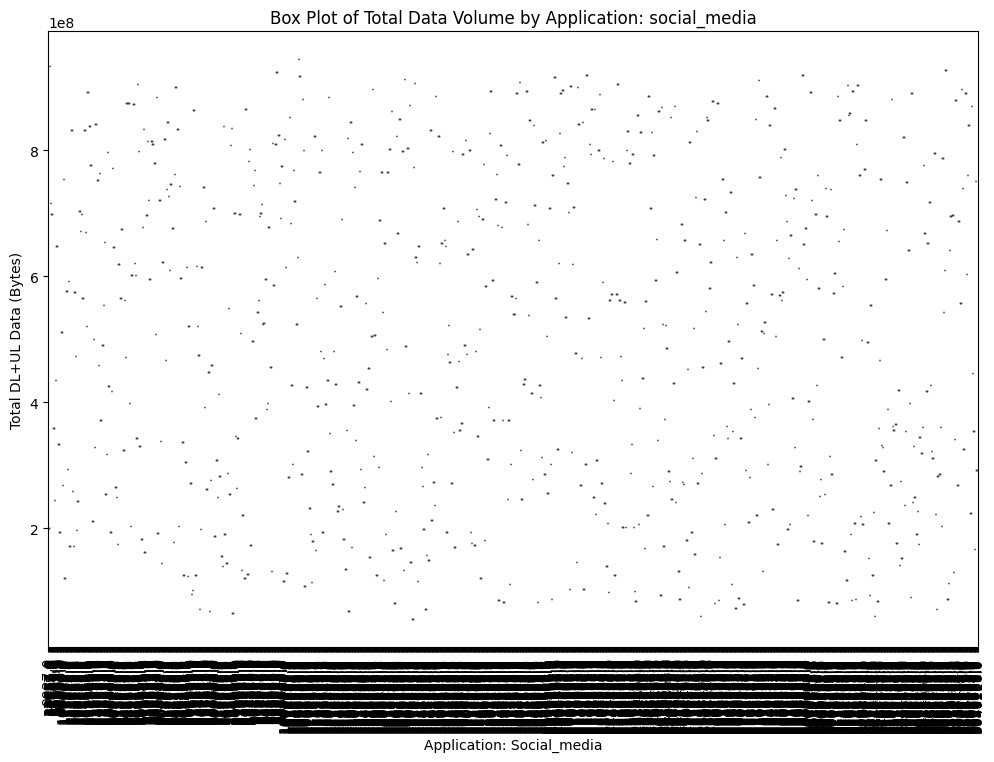

In [10]:
# correlation between total_data_volume vs social_media
plt.figure(figsize=(12, 8))
sns.boxplot(x='social_media_data', y='Total_DL_UL', data=applnData.sample(frac=0.01))
plt.title('Box Plot of Total Data Volume by Application: social_media')
plt.xlabel('Application: Social_media')
plt.ylabel('Total DL+UL Data (Bytes)')
plt.xticks(rotation=90)  # Rotate labels for readability if needed
plt.show()